In [54]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt

In [39]:
# Step 1: Load the dataset
data = fetch_california_housing(as_frame=True)
df = data.frame

In [40]:
# Step 2: Preprocess the data
X = df.drop('MedHouseVal', axis=1)  # Features
y = df['MedHouseVal']              # Target

In [41]:
# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
# Step 4: Define the Random Forest model
rf_model = RandomForestRegressor(random_state=42)

In [43]:
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt']
}

In [44]:
# Step 6: Perform GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                           scoring='r2', cv=3, verbose=2, n_jobs=-1)

In [45]:
# Fit the model
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, None], 'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100]},
             scoring='r2', verbose=2)

In [46]:
# Step 7: Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")


Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [47]:
# Step 8: Evaluate the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [55]:
# Model evaluation
mse = mean_squared_error(y_test, y_pred)  # y_test = actual values from the test set

# Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate R-squared (Coefficient of Determination)
r_squared = r2_score(y_test, y_pred)

In [56]:
# Step 9: Feature Importance (Optional)
importance = best_model.feature_importances_
features = X.columns

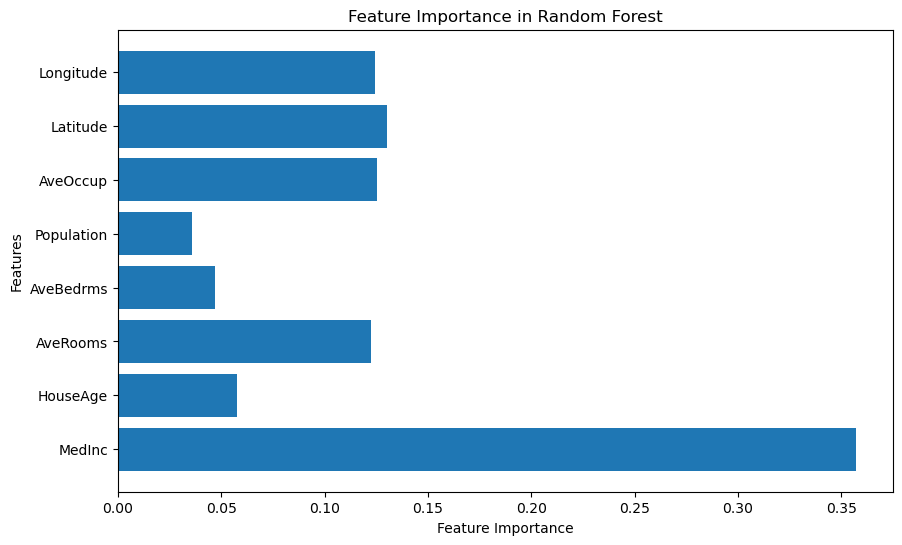

In [57]:
# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(features, importance)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance in Random Forest')
plt.show()

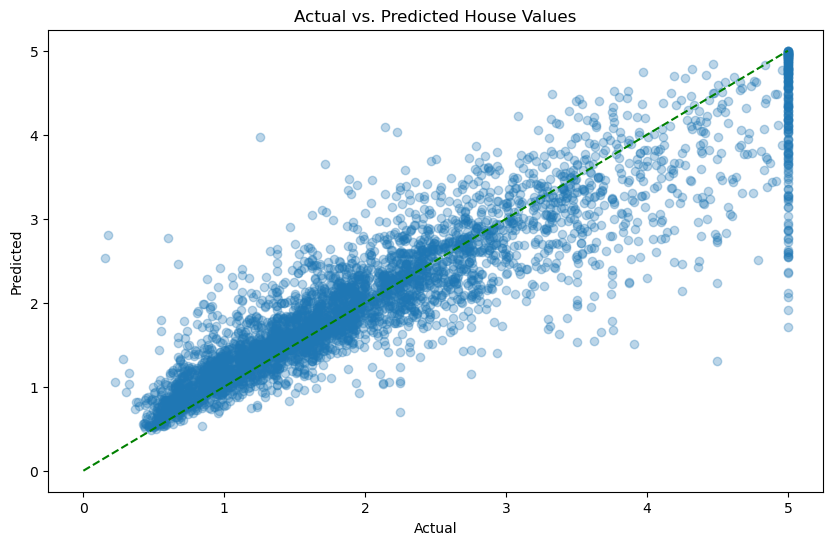

In [58]:
# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([0, 5], [0, 5], '--g')  # A reference line for perfect predictions
plt.title('Actual vs. Predicted House Values')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [59]:
# Print the results
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared: {r_squared}")


Mean Squared Error (MSE): 0.2492420840595412
Root Mean Squared Error (RMSE): 0.4992415087505657
Mean Absolute Error (MAE): 0.3314224950581397
R-squared: 0.8097982475714375
